In [19]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install scikit-learn

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [23]:
# Cell 2: Load and Explore the Dataset
df = pd.read_csv('heart.csv')
print("Dataset loaded successfully!")
print("Columns in the dataset:")
print(df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset loaded successfully!
Columns in the dataset:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

First 5 rows of the dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
# Cell 3: Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(df.info())

print("\nSummary Statistics (numeric columns):")
display(df.describe())

print("\nMissing Values Per Column:")
display(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Summary Statistics (numeric columns):


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Missing Values Per Column:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Numeric columns used for Correlation Matrix:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


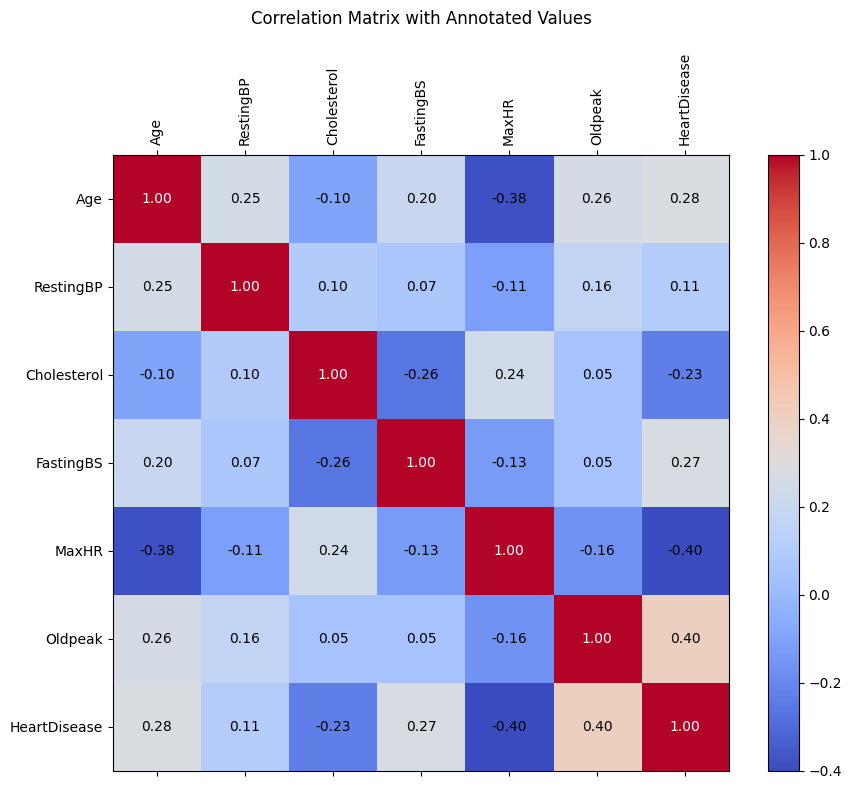

In [25]:
# For the correlation matrix, select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print("\nNumeric columns used for Correlation Matrix:")
print(numeric_df.columns.tolist())

# Plot an annotated correlation heatmap
correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set tick labels using the column names
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Annotate the heatmap with correlation coefficients
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        value = correlation_matrix.iloc[i, j]
        text_color = 'white' if abs(value) > 0.5 else 'black'
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color=text_color)

plt.title("Correlation Matrix with Annotated Values", pad=20)
plt.show()

In [26]:
# Cell 4: Data Preprocessing and Target Selection

# Check if 'HeartDisease' column exists in the DataFrame
if 'HeartDisease' not in df.columns:
    raise ValueError("Expected a column named 'HeartDisease' in the dataset.")

# Set 'HeartDisease' as the target variable and remove it from the features DataFrame
target = df['HeartDisease']
features = df.drop('HeartDisease', axis=1)

print("Target and features have been successfully separated.")
print("Target column head:")
display(target.head())
print("Feature columns:")
print(features.columns.tolist())

# Convert categorical features to numeric using one-hot encoding.
features_encoded = pd.get_dummies(features, drop_first=True)

print("\n Feature columns after encoding:")
print(features_encoded.columns.tolist())

Target and features have been successfully separated.
Target column head:


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

Feature columns:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

 Feature columns after encoding:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [27]:
# In train_models.ipynb (after one-hot encoding)
feature_names = features_encoded.columns.tolist()
print("Encoded Feature Names:", feature_names)
# Save the list to a pickle file
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


Encoded Feature Names: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [28]:
# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target,test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")
print("Training set shape:", X_train.shape, "and", y_train.shape)
print("Test set shape:", X_test.shape, "and", y_test.shape)

Data split into training and testing sets successfully.
Training set shape: (734, 15) and (734,)
Test set shape: (184, 15) and (184,)


In [29]:
# Train a Random Forest classifier.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model.
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [30]:
# Train an SVM classifier. 'probability=True' enables probability estimates.
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the SVM model.
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6847826086956522
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184



In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# First, scale the data (features_encoded from one-hot encoding)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Initialize lists to store results for different k's
ks = range(2, 11)  # Trying k from 2 to 10
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(features_scaled)
    inert = km.inertia_
    sil = silhouette_score(features_scaled, km.labels_)
    
    inertias.append(inert)
    sil_scores.append(sil)
    
    print(f"k = {k:2d} | Inertia = {inert:7.2f} | Silhouette Score = {sil:0.3f}")

k =  2 | Inertia = 11304.93 | Silhouette Score = 0.179
k =  3 | Inertia = 10383.81 | Silhouette Score = 0.195
k =  4 | Inertia = 9506.52 | Silhouette Score = 0.181
k =  5 | Inertia = 8751.28 | Silhouette Score = 0.173
k =  6 | Inertia = 8215.33 | Silhouette Score = 0.165
k =  7 | Inertia = 7865.93 | Silhouette Score = 0.164
k =  8 | Inertia = 7583.44 | Silhouette Score = 0.161
k =  9 | Inertia = 7266.15 | Silhouette Score = 0.162
k = 10 | Inertia = 7115.28 | Silhouette Score = 0.158


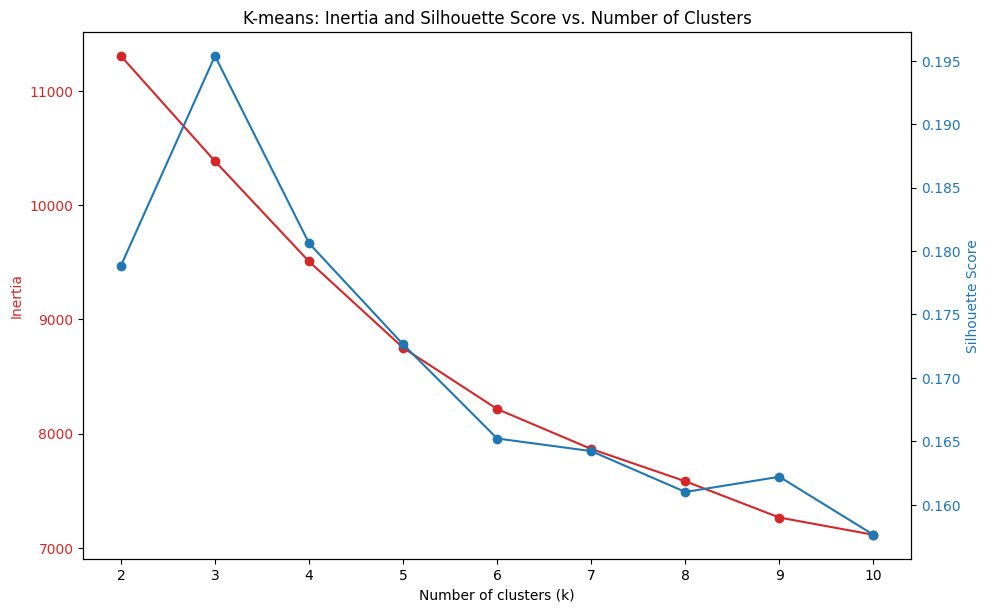

In [32]:
# Plot Inertia and Silhouette Score versus number of clusters
fig, ax1 = plt.subplots(figsize=(10, 6))

color_inertia = 'tab:red'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia', color=color_inertia)
ax1.plot(ks, inertias, color=color_inertia, marker='o', label='Inertia')
ax1.tick_params(axis='y', labelcolor=color_inertia)

ax2 = ax1.twinx() 
color_sil = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color_sil)
ax2.plot(ks, sil_scores, color=color_sil, marker='o', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color_sil)

fig.tight_layout()  
plt.title("K-means: Inertia and Silhouette Score vs. Number of Clusters")
plt.show()

Final K-means Model Chosen:
Optimal k = 3
Final K-means Inertia: 10383.81470561846
Final K-means Silhouette Score: 0.19537553401773664


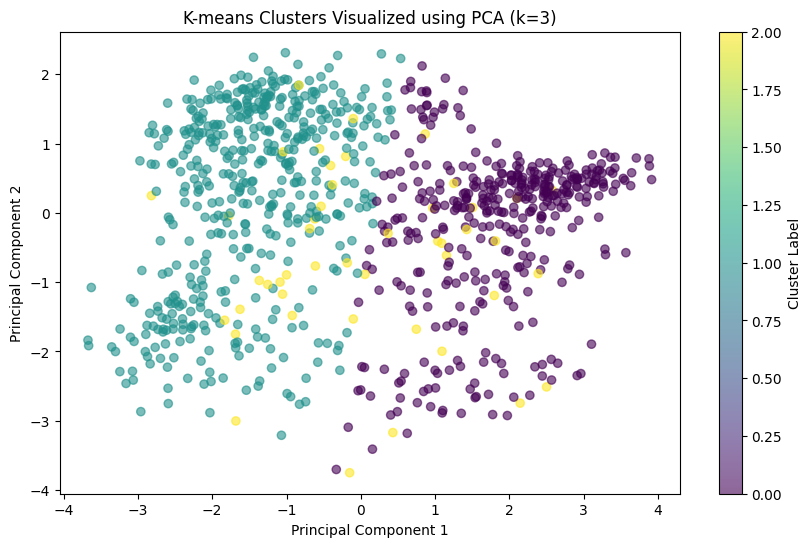

In [33]:
# Based on the above tuning, choose an optimal number of clusters.
# (k=3 shows a good balance, set optimal_k = 3)
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
kmeans_model.fit(features_scaled)
final_inertia = kmeans_model.inertia_
final_sil_score = silhouette_score(features_scaled, kmeans_model.labels_)
print("Final K-means Model Chosen:")
print("Optimal k =", optimal_k)
print("Final K-means Inertia:", final_inertia)
print("Final K-means Silhouette Score:", final_sil_score)

# Visualize the final clustering result using PCA.
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=kmeans_model.labels_, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Cluster Label")
plt.title(f"K-means Clusters Visualized using PCA (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [34]:
# Random Forest Results
print("Random Forest Classifier Results:")
print("Accuracy: {:.3f}".format(rf_accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("--------------------------------------------------")

# SVM Results
print("SVM Classifier Results:")
print("Accuracy: {:.3f}".format(svm_accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("--------------------------------------------------")

# K-means Clustering Results
print("K-means Clustering Results:")
print("Optimal number of clusters (k):", optimal_k)
print("Final Inertia: {:.2f}".format(final_inertia))
print("Final Silhouette Score: {:.3f}".format(final_sil_score))
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)
print("--------------------------------------------------")

Random Forest Classifier Results:
Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------
SVM Classifier Results:
Accuracy: 0.685
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184

--------------------------------------------------
K-means Clustering Results:
Optimal number of clusters (k): 3
Final Inertia: 10383.81
Final Silhouette Score

In [35]:
# Save the Random Forest, SVM, and final K-means models as pickle files.
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

print("Models saved as pickle files:")
print("random_forest_model.pkl")
print("svm_model.pkl")
print("kmeans_model.pkl")


Models saved as pickle files:
random_forest_model.pkl
svm_model.pkl
kmeans_model.pkl
